In [ ]:
# This file requires access to the full_metadata.csv

In [13]:
import pandas as pd
# loading the CSV into this file
try:
    df_metadata = pd.read_csv('/full_metadata.csv')
    # Map numerical toxicity values to descriptive labels
    df_metadata['toxicity'] = df_metadata['toxicity'].map({0: 'non-toxic', 1: 'toxic'})
    print("Successfully loaded full_metadata.csv and updated toxicity labels:")
    display(df_metadata.head())
except FileNotFoundError:
    print("Error: 'full_metadata.csv' not found. Please ensure the file is uploaded to the Colab environment.")
except Exception as e:
    print(f"An error occurred: {e}")

Successfully loaded full_metadata.csv and updated toxicity labels:


,class_id,slang,scientific_name,herbarium22_category_id,path,toxicity,species_label
0,0,Virginia creeper,Parthenocissus quinquefolia,10340,../input/toxic-plant-classification/tpc-imgs/n...,non-toxic,3
1,0,Virginia creeper,Parthenocissus quinquefolia,10340,../input/toxic-plant-classification/tpc-imgs/n...,non-toxic,3
2,0,Virginia creeper,Parthenocissus quinquefolia,10340,../input/toxic-plant-classification/tpc-imgs/n...,non-toxic,3
3,0,Virginia creeper,Parthenocissus quinquefolia,10340,../input/toxic-plant-classification/tpc-imgs/n...,non-toxic,3
4,0,Virginia creeper,Parthenocissus quinquefolia,10340,../input/toxic-plant-classification/tpc-imgs/n...,non-toxic,3


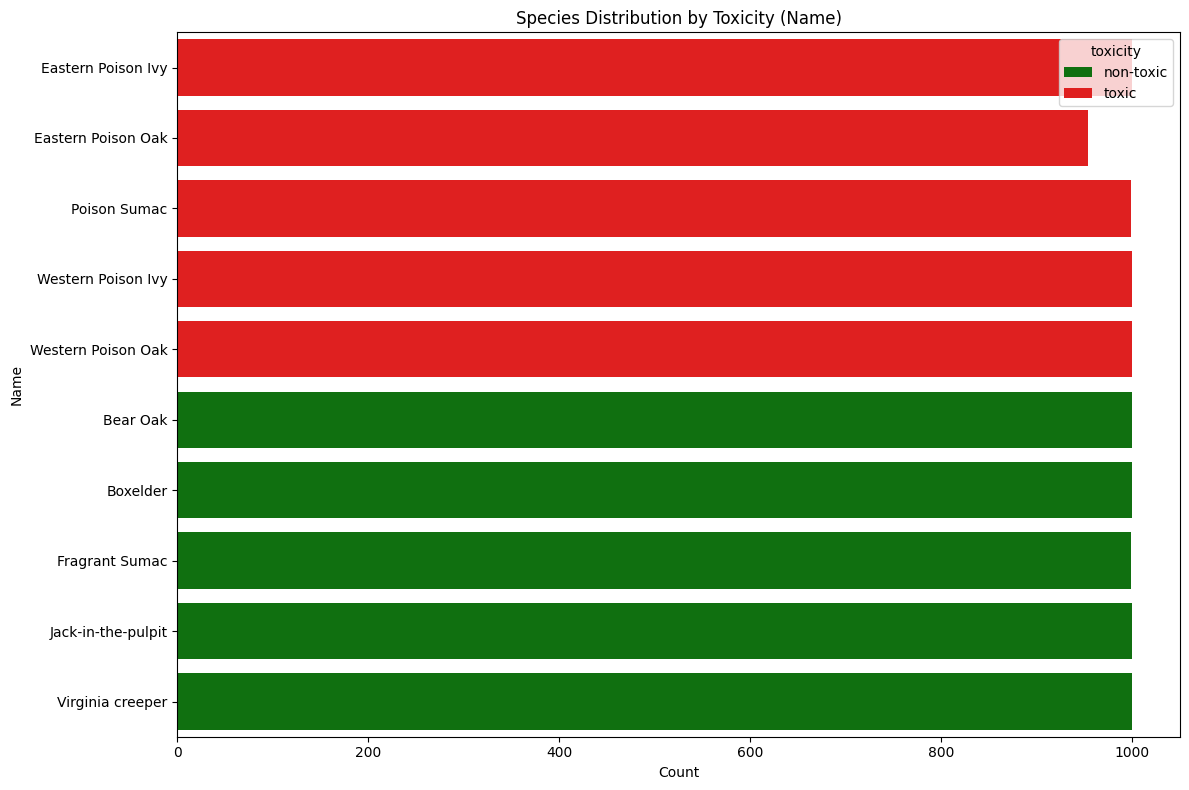

In [12]:
# Graphing
import matplotlib.pyplot as plt
import seaborn as sns

if 'df_metadata' in locals():
    if 'slang' in df_metadata.columns and 'toxicity' in df_metadata.columns:
        # Ensure 'toxicity' column is mapped to descriptive labels for plotting
        if df_metadata['toxicity'].dtype in ['int64', 'int32']:
            df_metadata['toxicity'] = df_metadata['toxicity'].map({0: 'non-toxic', 1: 'toxic'})

        # Determine the order of slang names for the y-axis
        # Identify species that have at least one 'toxic' entry by slang name
        toxic_slang = df_metadata[df_metadata['toxicity'] == 'toxic']['slang'].unique()
        # Identify species that are *only* non-toxic (i.e., not in toxic_slang list) by slang name
        nontoxic_slang_only = df_metadata[~df_metadata['slang'].isin(toxic_slang)]['slang'].unique()

        # Combine and sort for the plot order: toxic slang first, then non-toxic only slang
        plot_order_slang = sorted(list(toxic_slang)) + sorted(list(nontoxic_slang_only))

        plt.figure(figsize=(12, 8)) # Adjusted figure size for y-axis labels
        sns.countplot(data=df_metadata, y='slang', hue='toxicity', order=plot_order_slang, palette={'non-toxic': 'green', 'toxic': 'red'})
        plt.title('Species Distribution by Toxicity (Name)')
        plt.xlabel('Count')
        plt.ylabel('Name')
        plt.tight_layout()
        plt.show()
    else:
        print("Error: 'slang' or 'toxicity' column not found in df_metadata. Please check the DataFrame.")
else:
    print("Error: 'df_metadata' DataFrame not found. Please ensure it has been loaded successfully.")